In [28]:
import time
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, RandomForestRegressor
import requests, datetime, time, h5py, json
from sklearn.externals import joblib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Importing X_train and y_train

In [29]:
y_train = joblib.load('y_trainLasVegas.joblib')
X_train = joblib.load('X_trainLasVegas.joblib')

#### Creating y_train for classification

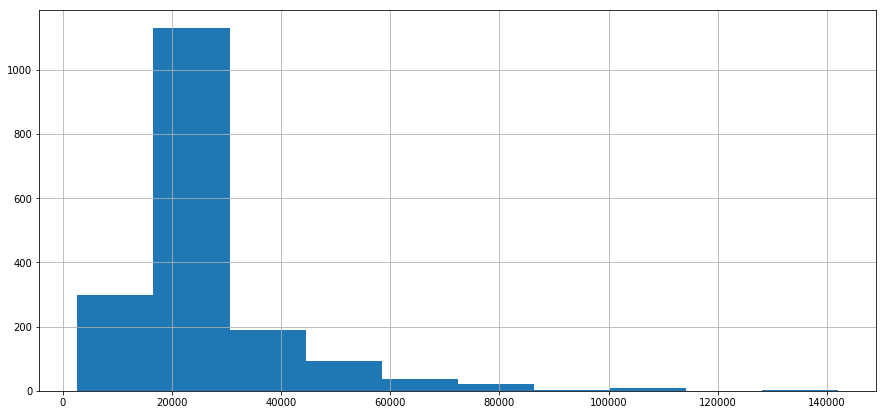

In [32]:
plt.figure(figsize=(15,7))
y_train.hist();

In [12]:
y_train.describe()

count      1784.000000
mean      25769.674888
std       14656.852380
min        2674.000000
25%       18137.000000
50%       22337.000000
75%       27833.000000
max      142100.000000
Name: income, dtype: float64

In [13]:
X_train.head()

,landarea,waterarea,0_restaurants_near,0_restaurants_far,1_restaurants_near,1_restaurants_far,2_restaurants_near,2_restaurants_far,3_restaurants_near,3_restaurants_far,...,0_physicaltherapy_near,0_physicaltherapy_far,1_physicaltherapy_near,1_physicaltherapy_far,2_physicaltherapy_near,2_physicaltherapy_far,3_physicaltherapy_near,3_physicaltherapy_far,4_physicaltherapy_near,4_physicaltherapy_far
0,0,0,0,1,8,37,4,26,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,31,0,22,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,3,3,22,3,16,0,0,...,1,3,0,0,0,0,0,0,0,0
3,0,0,0,2,0,22,1,12,0,8,...,0,3,0,0,0,0,0,0,0,0
4,0,0,0,35,0,71,0,11,0,3,...,0,3,0,0,0,0,0,0,0,0


In [33]:
## Creating column y_train_class

y_train_class = pd.Series(['NaN' for i in range(len(y_train)) ])

## Creating y_train for classification

brackets ={'$0-$10.99k': 1,'$11-$20.99k':2, '$21-$30.99k':3, '$31-$40.99k':4, '$41-$50.99k':5, '$51-$60.99k':6,
            '$61-$70.99k':7, '$71-$80.99k':8, '$81+k.99':9}

for index, value in enumerate(y_train):
    if y_train.iloc[index] < 11000:
        y_train_class.iloc[index] = brackets['$0-$10.99k']
    elif y_train.iloc[index] < 21000:
        y_train_class.iloc[index] = brackets['$11-$20.99k']
    elif y_train.iloc[index] < 31000:
        y_train_class.iloc[index] = brackets['$21-$30.99k']
    elif y_train.iloc[index] < 41000:
        y_train_class.iloc[index] = brackets['$31-$40.99k']   
    elif y_train.iloc[index] < 51000:
        y_train_class.iloc[index] = brackets['$41-$50.99k']
    elif y_train.iloc[index] < 61000:
        y_train_class.iloc[index] = brackets['$51-$60.99k']
    elif y_train.iloc[index] < 71000:
        y_train_class.iloc[index] = brackets['$61-$70.99k']   
    elif y_train.iloc[index] < 81000:
        y_train_class.iloc[index] = brackets['$71-$80.99k']
    else:
        y_train_class.iloc[index] = brackets['$81+k.99']

In [44]:
## Checking mapping output
#df_y_train = pd.DataFrame(y_train)
#df_y_train_class = pd.DataFrame(y_train_class)
#pd.concat([df_y_train, df_y_train_class]
 #         , axis=1, index=).head()

In [115]:
y_train_class.to_csv('y_train_class')

## RANDOM FOREST

In [113]:
import warnings
warnings.filterwarnings("ignore")

#### Classification

In [103]:
## Instantiating RandomForest model.
rfc = RandomForestClassifier(n_estimators = 100,
    max_depth= 15,
    max_features= 'auto')

In [109]:
%%time 
cross_val_score(rfc, X_train, y_train_class, cv = 5).mean()

CPU times: user 2.59 s, sys: 7.05 ms, total: 2.59 s
Wall time: 2.59 s


0.9065895303691696

In [ ]:
%%time
## Performing Grid Searching
rfc = RandomForestClassifier()   #you could add random_state, but you don0't want to tune around a rspecific random state.
rf_params = {
    'n_estimators': [43, 45, 47],
    'max_depth': [None, 2, 3, 4],
    'max_features': ['auto']                #when on auto is the square root of number of rows. 
                                                 #['auto', 1.0] if you show each tree 100% of ... you are doing a bagging classifier!
}
gs = GridSearchCV(rfc, param_grid=rf_params, cv=5)
gs.fit(X_train, y_train_class)
print(gs.best_score_)
gs.best_params_

#### Regression

In [111]:
rfr = RandomForestRegressor(n_estimators = 100,
    max_depth= 10,
    max_features= 'auto')
#rf_params = {}

In [112]:
%%time
cross_val_score(rfr, X_train, y_train, cv = 5).mean()

CPU times: user 54.8 s, sys: 116 ms, total: 54.9 s
Wall time: 55 s


0.7119831403646734

In [48]:
%%time
## Performing Grid Searching
rfr = RandomForestRegressor()   #you could add random_state, but you don0't want to tune around a rspecific random state.
rfr_params = {
    'n_estimators': [40, 60, 80, 100],
    'max_depth': [None, 2, 3, 4, 10, 12, 15],
    'max_features': ['auto']                #when on auto is the square root of number of rows. 
                                                 #['auto', 1.0] if you show each tree 100% of ... you are doing a bagging classifier!
}
gs = GridSearchCV(rfr, param_grid=rfr_params, cv=5)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.7825449858967413
CPU times: user 14min 59s, sys: 1.01 s, total: 15min
Wall time: 15min


In [49]:
gs.best_params_

{'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}

#### Train Test Splitting

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.15, random_state=42) 

#### Features Scaling

In [62]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint16 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint16 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint16 were all converted to float64 by StandardScaler.
  """


## REGRESSION

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA

In [101]:
class_models = [linear_reg, knn_reg, cart_reg, bagged_reg, adaboost_reg, random_forest_reg, support_vector_reg]

#### Without PCA

In [64]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train_scaled, y_train)

cart_reg = DecisionTreeRegressor()
cart_reg.fit(X_train_scaled, y_train)

bagged_reg = BaggingRegressor()
bagged_reg.fit(X_train_scaled, y_train)

adaboost_reg = AdaBoostRegressor()
adaboost_reg.fit(X_train_scaled, y_train)

random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)

support_vector_reg = SVR()
support_vector_reg.fit(X_train_scaled, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [65]:
from sklearn.metrics import mean_squared_error

def rmse_score(model, X_train, X_test, y_train, y_test):
    mse_train = mean_squared_error(y_true = y_train,
                                  y_pred = model.predict(X_train))
    mse_test = mean_squared_error(y_true = y_test,
                                  y_pred = model.predict(X_test))
    rmse_train = mse_train ** 0.5
    rmse_test = mse_test ** 0.5
    
    print("The training RMSE for " + str(model) + " is: " + str(rmse_train))
    print("The testing RMSE for " + str(model) + " is: " + str(rmse_test))
    return (rmse_train, rmse_test)

In [66]:
rmse_score(linear_reg, X_train_scaled, X_test_scaled, y_train, y_test)

The training RMSE for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) is: 2.6427887491002686e-13
The testing RMSE for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) is: 13.214595826817288


(2.6427887491002686e-13, 13.214595826817288)

In [67]:
rmse_score(knn_reg, X_train_scaled, X_test_scaled, y_train, y_test)

The training RMSE for KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform') is: 0.6076888301472344
The testing RMSE for KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform') is: 0.5695489135379689


(0.6076888301472344, 0.5695489135379689)

In [68]:
rmse_score(cart_reg, X_train_scaled, X_test_scaled, y_train, y_test)

The training RMSE for DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') is: 0.0
The testing RMSE for DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') is: 0.7521897856819185


(0.0, 0.7521897856819185)

In [69]:
rmse_score(bagged_reg, X_train_scaled, X_test_scaled, y_train, y_test)

The training RMSE for BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False) is: 0.27308054007281374
The testing RMSE for BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False) is: 0.6267781722371819


(0.27308054007281374, 0.6267781722371819)

In [70]:
rmse_score(adaboost_reg, X_train_scaled, X_test_scaled, y_train, y_test)

The training RMSE for AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) is: 0.848002560893862
The testing RMSE for AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) is: 0.8456140546402734


(0.848002560893862, 0.8456140546402734)

In [71]:
rmse_score(support_vector_reg, X_train_scaled, X_test_scaled, y_train, y_test)

The training RMSE for SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False) is: 0.813239105707988
The testing RMSE for SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False) is: 0.6248344103933527


(0.813239105707988, 0.6248344103933527)

In [72]:
rmse_score(random_forest_reg, X_train_scaled, X_test_scaled, y_train, y_test)

The training RMSE for RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False) is: 2.500543419199984
The testing RMSE for RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False) is: 2.4755027843021544


(2.500543419199984, 2.4755027843021544)

**Comment**
With default parameters, it seems that we should investigate further the following regression models:
- **knn** (0.6076888301472344, 0.5695489135379689) #RMSE, (train, test)
- **SVR** (0.813239105707988, 0.6248344103933527)
- **Adaboost** (0.848002560893862, 0.8456140546402734) 

#### PCA

In [115]:
#X_train

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.15, random_state=42) 

In [117]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint16 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint16 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint16 were all converted to float64 by StandardScaler.
  """


In [120]:
## Applying PCA to Xs
pca = PCA()
pca = pca.fit(X_train_scaled)
Z_train = pca.transform(X_train_scaled)
Z_test =pca.transform(X_test_scaled)

In [121]:
# Examine explained variance.
var_exp = pca.explained_variance_ratio_
print('Explained variance:            ', np.round(var_exp, 4))

# Examine cumulative explained variance.
cum_var_exp = np.cumsum(var_exp)
print('Cumulative explained variance: ', cum_var_exp)

Explained variance:             [0.1014 0.0534 0.0444 ... 0.     0.     0.    ]
Cumulative explained variance:  [0.10144166 0.15482658 0.19924002 ... 1.         1.         1.        ]


In [135]:
## Looking for the ith principal that combined with more important principals explains 99% of variance.
cum_var_exp_df = pd.DataFrame(cum_var_exp)
cum_var_exp_df[260:267]

,0
260,0.989504
261,0.989647
262,0.989785
263,0.989924
264,0.990059
265,0.990194
266,0.990326


In [136]:
## Applying PCA to Xs
pca = PCA(n_components=264)
pca = pca.fit(X_train_scaled)
Z_train = pca.transform(X_train_scaled)
Z_test =pca.transform(X_test_scaled)

In [137]:
Z_test.shape

(194, 264)

#### Regression with PCA

In [139]:
linear_reg_PCA = LinearRegression()
linear_reg_PCA.fit(Z_train, y_train)

knn_reg_PCA = KNeighborsRegressor()
knn_reg_PCA.fit(Z_train, y_train)

cart_reg_PCA = DecisionTreeRegressor()
cart_reg_PCA.fit(Z_train, y_train)

bagged_reg_PCA = BaggingRegressor()
bagged_reg_PCA.fit(Z_train, y_train)

adaboost_reg_PCA = AdaBoostRegressor()
adaboost_reg_PCA.fit(Z_train, y_train)

random_forest_reg_PCA = RandomForestRegressor()
random_forest_reg_PCA.fit(Z_train, y_train)

support_vector_reg_PCA = SVR()
support_vector_reg_PCA.fit(Z_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [140]:
rmse_score(linear_reg_PCA, Z_train, Z_test, y_train, y_test)

The training RMSE for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) is: 0.5330416024064061
The testing RMSE for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) is: 0.838008473791076


(0.5330416024064061, 0.838008473791076)

In [141]:
rmse_score(knn_reg_PCA, Z_train, Z_test, y_train, y_test)

The training RMSE for KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform') is: 0.6647290550564173
The testing RMSE for KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform') is: 0.7212532048920202


(0.6647290550564173, 0.7212532048920202)

In [142]:
rmse_score(cart_reg_PCA, Z_train, Z_test, y_train, y_test)

The training RMSE for DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') is: 0.0
The testing RMSE for DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') is: 0.9109867766419526


(0.0, 0.9109867766419526)

In [143]:
rmse_score(bagged_reg_PCA, Z_train, Z_test, y_train, y_test)

The training RMSE for BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False) is: 0.3739946914736318
The testing RMSE for BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False) is: 0.6250360814327309


(0.3739946914736318, 0.6250360814327309)

In [144]:
rmse_score(adaboost_reg_PCA, Z_train, Z_test, y_train, y_test)

The training RMSE for AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) is: 0.8625511532481682
The testing RMSE for AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) is: 0.9652819915349301


(0.8625511532481682, 0.9652819915349301)

In [145]:
rmse_score(random_forest_reg_PCA, Z_train, Z_test, y_train, y_test)

The training RMSE for RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False) is: 0.37399469147363185
The testing RMSE for RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False) is: 0.6230950350311038


(0.37399469147363185, 0.6230950350311038)

In [146]:
rmse_score(support_vector_reg_PCA, Z_train, Z_test, y_train, y_test)

The training RMSE for SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False) is: 0.7746690072748086
The testing RMSE for SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False) is: 0.8100704532710763


(0.7746690072748086, 0.8100704532710763)

**RMSE reg models with default parameters with PCA**
- linear_reg_PCA - (0.5330416024064061, 0.838008473791076)
- knn_reg_PCA - (0.6647290550564173, 0.7212532048920202)
- cart_reg_PCA - (0.0, 0.9109867766419526)
- bagged_reg_PCA - (0.3739946914736318, 0.6250360814327309)
- adaboost_reg_PCA - (0.8625511532481682, 0.9652819915349301)
- random_forest_reg_PCA - (0.37399469147363185, 0.6230950350311038)
- support_vector_reg_PCA - (0.7746690072748086, 0.8100704532710763)

In [147]:
pca_reg_models = [linear_reg_PCA, knn_reg_PCA, cart_reg_PCA, bagged_reg_PCA, adaboost_reg_PCA, 
                  random_forest_reg_PCA, support_vector_reg_PCA]

In [148]:
#for model in pca_reg_models:
 #   joblib.dump(model, ('Models/Raw_Models/PCA/reg/'+model.__class__.__name__+'.joblib'))

## CLASSIFICATION

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train_class, test_size=.15, random_state=42) 

In [73]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint16 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint16 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint16 were all converted to float64 by StandardScaler.
  """


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

In [100]:
reg_models = [logreg_class, knn_class, cart_class, bagged_class, 
              random_forest_class, adaboost_class, support_vector_class]

In [75]:
logreg_class = LogisticRegression()
logreg_class.fit(X_train_scaled, y_train)

knn_class = KNeighborsClassifier()
knn_class.fit(X_train_scaled, y_train)

cart_class = DecisionTreeClassifier()
cart_class.fit(X_train_scaled, y_train)

bagged_class = BaggingClassifier()
bagged_class.fit(X_train_scaled, y_train)

random_forest_class = RandomForestClassifier()
random_forest_class.fit(X_train_scaled, y_train)

adaboost_class = AdaBoostClassifier()
adaboost_class.fit(X_train_scaled, y_train)

support_vector_class = SVC()
support_vector_class.fit(X_train_scaled, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [81]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [88]:
def accuracy_scorer(model, X_train, X_test, y_train, y_test):
    accuracy_train = f1_score(y_true = y_train,
                        y_pred = model.predict(X_train), average=None)
    accuracy_test = f1_score(y_true = y_test,
                       y_pred = model.predict(X_test), average=None)
    
    print("The training accuracy-score for " + str(model) + " is: " + str(accuracy_train))
    print("The testing accuracy-score for " + str(model) + " is: " + str(accuracy_test))
    return (accuracy_train, accuracy_test)

In [89]:
print(accuracy_scorer(logreg_class, X_train_scaled, X_test_scaled, y_train, y_test))
print()
print()
print(accuracy_scorer(knn_class, X_train_scaled, X_test_scaled, y_train, y_test))
print()
print()
print(accuracy_scorer(cart_class, X_train_scaled, X_test_scaled, y_train, y_test))
print()
print()
print(accuracy_scorer(bagged_class, X_train_scaled, X_test_scaled, y_train, y_test))
print()
print()
print(accuracy_scorer(random_forest_class, X_train_scaled, X_test_scaled, y_train, y_test))
print()
print()
print(accuracy_scorer(adaboost_class, X_train_scaled, X_test_scaled, y_train, y_test))
print()
print()
print(accuracy_scorer(support_vector_class, X_train_scaled, X_test_scaled, y_train, y_test))

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The training accuracy-score for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) is: [1.         0.9894129  0.98432602 0.98867925 1.         0.98734177
 1.         1.         1.        ]
The testing accuracy-score for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) is: [0.90909091 0.90721649 0.87573964 0.83636364 1.         0.8
 0.         1.         0.5       ]
([1.0, 0.9894128970163618, 0.9843260188087775, 0.9886792452830188, 1.0, 0.9873417721518987, 1.0, 1.0, 1.0], [0.9090909090909091, 0.9072164948453608, 0.8757396449704142, 0.8363636363636363, 1.0, 0.8, 0.0, 

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:114

The training accuracy-score for KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform') is: [0.89855072 0.89760766 0.8556701  0.79681275 0.83544304 0.8045977
 0.375      0.8        0.69387755]
The testing accuracy-score for KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform') is: [0.71428571 0.81443299 0.79069767 0.81632653 0.72727273 0.83333333
 0.         0.         1.        ]
([0.8985507246376813, 0.8976076555023923, 0.8556701030927835, 0.796812749003984, 0.8354430379746836, 0.8045977011494252, 0.37499999999999994, 0.8, 0.6938775510204082], [0.7142857142857143, 0.8144329896907218, 0.7906976744186046, 0.8163265306122449, 0.7272727272727272, 0.8333333333333334, 0.0, 0.0, 1.0])


The training accuracy-score for DecisionTreeClassifier(class_weight=None, criterion='

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The training accuracy-score for SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) is: [0.625      0.89373814 0.85798237 0.725      0.77142857 0.75362319
 0.         1.         0.82352941]
The testing accuracy-score for SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) is: [0.28571429 0.83838384 0.81318681 0.69565217 0.66666667 0.5
 0.         1.         0.66666667]
([0.625, 0.8937381404174574, 0.8579823702252694, 0.7250000000000001, 0.7714285714285716, 0.7536231884057972, 0.0, 1.0, 0.823529411764706], [0.28571428571428575, 0.8383838383838383, 0.8131868131868131, 0.6956521739130435, 0.6666666666666665, 0.5, 0.0, 1.0, 0.66

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [90]:
def f1_scorer(model, X_train, X_test, y_train, y_test):
    f1_train = f1_score(y_true = y_train,
                        y_pred = model.predict(X_train), average=None)
    f1_test = f1_score(y_true = y_test,
                       y_pred = model.predict(X_test), average=None)
    
    print("The training F1-score for " + str(model) + " is: " + str(f1_train))
    print("The testing F1-score for " + str(model) + " is: " + str(f1_test))
    return (f1_train, f1_test)

In [91]:
print(f1_scorer(logreg_class, X_train_scaled, X_test_scaled, y_train, y_test))
print()
print()
print(f1_scorer(knn_class, X_train_scaled, X_test_scaled, y_train, y_test))
print()
print()
print(f1_scorer(cart_class, X_train_scaled, X_test_scaled, y_train, y_test))
print()
print()
print(f1_scorer(bagged_class, X_train_scaled, X_test_scaled, y_train, y_test))
print()
print()
print(f1_scorer(random_forest_class, X_train_scaled, X_test_scaled, y_train, y_test))
print()
print()
print(f1_scorer(adaboost_class, X_train_scaled, X_test_scaled, y_train, y_test))
print()
print()
print(f1_scorer(support_vector_class, X_train_scaled, X_test_scaled, y_train, y_test))

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The training F1-score for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) is: [1.         0.9894129  0.98432602 0.98867925 1.         0.98734177
 1.         1.         1.        ]
The testing F1-score for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) is: [0.90909091 0.90721649 0.87573964 0.83636364 1.         0.8
 0.         1.         0.5       ]
(array([1.        , 0.9894129 , 0.98432602, 0.98867925, 1.        ,
       0.98734177, 1.        , 1.        , 1.        ]), array([0.90909091, 0.90721649, 0.87573964, 0.83636364, 1.        ,
       0.8       , 0.   

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:114

The training F1-score for KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform') is: [0.89855072 0.89760766 0.8556701  0.79681275 0.83544304 0.8045977
 0.375      0.8        0.69387755]
The testing F1-score for KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform') is: [0.71428571 0.81443299 0.79069767 0.81632653 0.72727273 0.83333333
 0.         0.         1.        ]
(array([0.89855072, 0.89760766, 0.8556701 , 0.79681275, 0.83544304,
       0.8045977 , 0.375     , 0.8       , 0.69387755]), array([0.71428571, 0.81443299, 0.79069767, 0.81632653, 0.72727273,
       0.83333333, 0.        , 0.        , 1.        ]))


The training F1-score for DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The training F1-score for SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) is: [0.625      0.89373814 0.85798237 0.725      0.77142857 0.75362319
 0.         1.         0.82352941]
The testing F1-score for SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) is: [0.28571429 0.83838384 0.81318681 0.69565217 0.66666667 0.5
 0.         1.         0.66666667]
(array([0.625     , 0.89373814, 0.85798237, 0.725     , 0.77142857,
       0.75362319, 0.        , 1.        , 0.82352941]), array([0.28571429, 0.83838384, 0.81318681, 0.69565217, 0.66666667,
       0.5       , 0.        , 1.        , 0.66666667]))


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [92]:
def f1_scorer_micro(model, X_train, X_test, y_train, y_test):
    f1_train = f1_score(y_true = y_train,
                        y_pred = model.predict(X_train), average='micro')
    f1_test = f1_score(y_true = y_test,
                       y_pred = model.predict(X_test), average='micro')
    
    print("The training F1-score-micro for " + str(model) + " is: " + str(f1_train))
    print("The testing F1-score-micro for " + str(model) + " is: " + str(f1_test))
    return (f1_train, f1_test)

In [93]:
print(f1_scorer_micro(logreg_class, X_train_scaled, X_test_scaled, y_train, y_test))
print()
print()
print(f1_scorer_micro(knn_class, X_train_scaled, X_test_scaled, y_train, y_test))
print()
print()
print(f1_scorer_micro(cart_class, X_train_scaled, X_test_scaled, y_train, y_test))
print()
print()
print(f1_scorer_micro(bagged_class, X_train_scaled, X_test_scaled, y_train, y_test))
print()
print()
print(f1_scorer_micro(random_forest_class, X_train_scaled, X_test_scaled, y_train, y_test))
print()
print()
print(f1_scorer_micro(adaboost_class, X_train_scaled, X_test_scaled, y_train, y_test))
print()
print()
print(f1_scorer_micro(support_vector_class, X_train_scaled, X_test_scaled, y_train, y_test))

The training F1-score-micro for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) is: 0.9883540372670807
The testing F1-score-micro for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) is: 0.881578947368421
(0.9883540372670807, 0.881578947368421)


The training F1-score-micro for KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform') is: 0.8594720496894411
The testing F1-score-micro for KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowsk

**Comment**
With default parameters, it seems that we should investigate further the following classification models:
- **knn** (0.8594720496894411, 0.7982456140350878) #RMSE, (train, test)
- **SVC** (0.8470496894409938, 0.793859649122807)
- **RandomForest** (0.9930124223602484, 0.8903508771929824)
- **LogisticRegression** (0.9883540372670807, 0.881578947368421)

In [96]:
#joblib.dump(adaboost_class, 'adaboost_class_lv.joblib', compress=4)

['adaboost_class_lv.joblib']

#### Saving models with default parameters

In [110]:
#for model in class_models:
 #   joblib.dump(model, ('Models/Raw_Models/class/'+model.__class__.__name__+'.joblib'))

In [111]:
#for model in reg_models:
 #   joblib.dump(model, ('Models/Raw_Models/reg/'+model.__class__.__name__+'.joblib'))

#### Classification with PCA

In [ ]:
pca_reg_models = [logreg_class_pca, knn_class_pca, cart_class_pca, bagged_class_pca, 
              random_forest_class_pca, adaboost_class_pca, support_vector_class_pca]

In [149]:
logreg_class_pca = LogisticRegression()
logreg_class_pca.fit(Z_train, y_train)

knn_class_pca = KNeighborsClassifier()
knn_class_pca.fit(Z_train, y_train)

cart_class_pca = DecisionTreeClassifier()
cart_class_pca.fit(Z_train, y_train)

bagged_class_pca = BaggingClassifier()
bagged_class_pca.fit(Z_train, y_train)

random_forest_class_pca = RandomForestClassifier()
random_forest_class_pca.fit(Z_train, y_train)

adaboost_class_pca = AdaBoostClassifier()
adaboost_class_pca.fit(Z_train, y_train)

support_vector_class_pca = SVC()
support_vector_class_pca.fit(Z_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [150]:
print(f1_scorer_micro(logreg_class_pca, Z_train, Z_test, y_train, y_test))
print()
print()
print(f1_scorer_micro(knn_class_pca, Z_train, Z_test, y_train, y_test))
print()
print()
print(f1_scorer_micro(cart_class_pca, Z_train, Z_test, y_train, y_test))
print()
print()
print(f1_scorer_micro(bagged_class_pca, Z_train, Z_test, y_train, y_test))
print()
print()
print(f1_scorer_micro(random_forest_class_pca, Z_train, Z_test, y_train, y_test))
print()
print()
print(f1_scorer_micro(adaboost_class_pca, Z_train, Z_test, y_train, y_test))
print()
print()
print(f1_scorer_micro(support_vector_class_pca, Z_train, Z_test, y_train, y_test))

The training F1-score-micro for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) is: 0.9725776965265083
The testing F1-score-micro for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) is: 0.8556701030927835
(0.9725776965265083, 0.8556701030927835)


The training F1-score-micro for KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform') is: 0.8510054844606947
The testing F1-score-micro for KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkow

**F1-Score Micro, classification models with default parameters with PCA**
- LogisticRegression - (0.9725776965265083, 0.8556701030927835)
- KNeighborsClassifier - (0.8510054844606947, 0.7938144329896907)
- DecisionTreeClassifier - (1.0, 0.7731958762886598)
- BaggingClassifier - (0.9926873857404022, 0.8350515463917526)
- RandomForestClassifier - (0.9954296160877514, 0.8298969072164948)
- AdaBoostClassifier - (0.4945155393053016, 0.44329896907216493)
- SVC - (0.9396709323583181, 0.8505154639175259)

In [151]:
#for model in pca_reg_models:
    #joblib.dump(model, ('Models/Raw_Models/PCA/clas/'+model.__class__.__name__+'.joblib'))